In [ ]:
import pandas as pd # Import necessary libraries for data analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv("FD002.csv")
data.head(20)

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,dataset_type,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,train,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,train,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,train,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,train,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,train,NaN
5,1,6,25.0045,0.6205,60.0,462.54,537.02,1266.38,1048.72,7.05,...,7868.87,10.8912,0.02,306,1915,84.93,14.28,8.5590,train,NaN
6,1,7,42.0043,0.8409,100.0,445.00,549.74,1347.45,1127.19,3.91,...,8075.54,9.3753,0.02,330,2212,100.00,10.62,6.4227,train,NaN
7,1,8,20.0020,0.7002,100.0,491.19,607.44,1481.69,1252.36,9.35,...,8049.26,9.2369,0.02,365,2324,100.00,24.33,14.7989,train,NaN
8,1,9,41.9995,0.8407,100.0,445.00,549.33,1348.23,1127.45,3.91,...,8065.78,9.3878,0.02,331,2212,100.00,10.69,6.3802,train,NaN
9,1,10,42.0011,0.8400,100.0,445.00,549.33,1356.40,1127.11,3.91,...,8069.11,9.3957,0.02,329,2212,100.00,10.57,6.2847,train,NaN


In [ ]:
data.tail(20)

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,dataset_type,RUL
87730,259,104,19.9998,0.7009,100.0,491.19,607.90,1479.87,1241.05,9.35,...,8070.70,9.1980,0.02,364,2324,100.00,24.50,14.6824,test,51.0
87731,259,105,20.0008,0.7000,100.0,491.19,607.19,1477.73,1250.40,9.35,...,8071.73,9.2053,0.02,364,2324,100.00,24.60,14.6791,test,51.0
87732,259,106,35.0011,0.8401,100.0,449.44,556.12,1366.85,1121.46,5.48,...,8078.84,9.3306,0.02,333,2223,100.00,14.69,8.9158,test,51.0
87733,259,107,10.0043,0.2517,100.0,489.05,604.61,1495.29,1297.43,10.52,...,8145.47,8.6422,0.03,370,2319,100.00,28.49,17.1865,test,51.0
87734,259,108,42.0014,0.8400,100.0,445.00,549.43,1350.36,1114.88,3.91,...,8096.11,9.3429,0.02,329,2212,100.00,10.51,6.3977,test,51.0
87735,259,109,42.0013,0.8400,100.0,445.00,549.44,1354.35,1128.81,3.91,...,8094.18,9.3750,0.02,331,2212,100.00,10.44,6.3308,test,51.0
87736,259,110,42.0054,0.8400,100.0,445.00,549.48,1353.03,1121.77,3.91,...,8094.72,9.3630,0.02,332,2212,100.00,10.74,6.3856,test,51.0
87737,259,111,0.0024,0.0000,100.0,518.67,642.46,1584.24,1401.20,14.62,...,8147.29,8.4166,0.03,393,2388,100.00,39.08,23.3627,test,51.0
87738,259,112,34.9981,0.8401,100.0,449.44,555.82,1361.42,1121.25,5.48,...,8071.45,9.3046,0.02,334,2223,100.00,14.89,8.9814,test,51.0
87739,259,113,0.0004,0.0003,100.0,518.67,642.69,1591.93,1397.73,14.62,...,8152.40,8.4013,0.03,392,2388,100.00,38.89,23.3397,test,51.0


In [ ]:
print(data.shape)
data.isna().sum()
print(data["unit_number"].nunique())


(87750, 28)
260


In [ ]:
grouped_data = data.groupby("unit_number")
grouped_data.head(30)

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,dataset_type,RUL
0,1,1,34.9983,0.8400,100.0,449.44,555.32,1358.61,1137.23,5.48,...,8048.56,9.3461,0.02,334,2223,100.00,14.73,8.8071,train,NaN
1,1,2,41.9982,0.8408,100.0,445.00,549.90,1353.22,1125.78,3.91,...,8072.30,9.3774,0.02,330,2212,100.00,10.41,6.2665,train,NaN
2,1,3,24.9988,0.6218,60.0,462.54,537.31,1256.76,1047.45,7.05,...,7864.87,10.8941,0.02,309,1915,84.93,14.08,8.6723,train,NaN
3,1,4,42.0077,0.8416,100.0,445.00,549.51,1354.03,1126.38,3.91,...,8068.66,9.3528,0.02,329,2212,100.00,10.59,6.4701,train,NaN
4,1,5,25.0005,0.6203,60.0,462.54,537.07,1257.71,1047.93,7.05,...,7861.23,10.8963,0.02,309,1915,84.93,14.13,8.5286,train,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53468,260,26,41.9995,0.8400,100.0,445.00,549.50,1353.06,1122.14,3.91,...,8079.55,9.3167,0.02,331,2212,100.00,10.52,6.3337,train,NaN
53469,260,27,19.9980,0.7000,100.0,491.19,607.15,1479.75,1249.29,9.35,...,8061.65,9.2101,0.02,364,2324,100.00,24.55,14.6973,train,NaN
53470,260,28,20.0057,0.7017,100.0,491.19,607.59,1479.80,1251.05,9.35,...,8062.83,9.1734,0.02,364,2324,100.00,24.58,14.7325,train,NaN
53471,260,29,10.0024,0.2514,100.0,489.05,604.22,1493.42,1299.57,10.52,...,8132.07,8.6489,0.03,368,2319,100.00,28.65,17.1190,train,NaN


In [ ]:
grouped_data_size=grouped_data.size()
print(grouped_data_size)
print()

max_index=grouped_data_size.idxmax()
max=grouped_data_size.max()
print(f"Engine {max_index} has the maximum number of cycles of {max}")

min_index=grouped_data_size.idxmin()
min=grouped_data_size.min()
print(f"Engine {min_index} has the minimum number of cycles of {min}")

mean=grouped_data_size.mean()
median = grouped_data_size.median()
standdev = grouped_data_size.std()
print(f"{mean} is the mean")
print(f"{median} is the median")
print(f"{standdev} is the standard deviation")
print()
print(f"All columns of raw dataset: {data.columns}")


unit_number
1      407
2      324
3      371
4      321
5      302
      ... 
256    222
257    508
258    241
259    328
260    316
Length: 260, dtype: int64

Engine 65 has the maximum number of cycles of 573
Engine 244 has the minimum number of cycles of 177
337.5 is the mean
331.5 is the median
78.46355177742693 is the standard deviation

All columns of raw dataset: Index(['unit_number', 'time_in_cycles', 'operational_setting_1',
       'operational_setting_2', 'operational_setting_3',
       'sensor_measurement_3', 'sensor_measurement_4', 'sensor_measurement_7',
       'sensor_measurement_8', 'sensor_measurement_9', 'sensor_measurement_12',
       'sensor_measurement_13', 'sensor_measurement_18', 'dataset_type',
       'RUL'],
      dtype='object')


In [ ]:
print(data.isna().sum()) # Number of Nan values in each feature

unit_number                  0
time_in_cycles               0
operational_setting_1        0
operational_setting_2        0
operational_setting_3        0
sensor_measurement_3         0
sensor_measurement_4         0
sensor_measurement_7         0
sensor_measurement_8         0
sensor_measurement_9         0
sensor_measurement_12        0
sensor_measurement_13        0
sensor_measurement_18        0
dataset_type                 0
RUL                      53759
dtype: int64


sensor_measurement_3      11227.665193
sensor_measurement_4      14183.795505
sensor_measurement_7      21371.965957
sensor_measurement_8      21076.202075
sensor_measurement_9     112767.429919
sensor_measurement_12     18997.532384
sensor_measurement_13     16383.469441
sensor_measurement_18     21109.604333
dtype: float64
sensor_measurement_3     0.000000
sensor_measurement_4     0.029113
sensor_measurement_7     0.099905
sensor_measurement_8     0.096992
sensor_measurement_9     1.000000
sensor_measurement_12    0.076520
sensor_measurement_13    0.050776
sensor_measurement_18    0.097321
dtype: float64


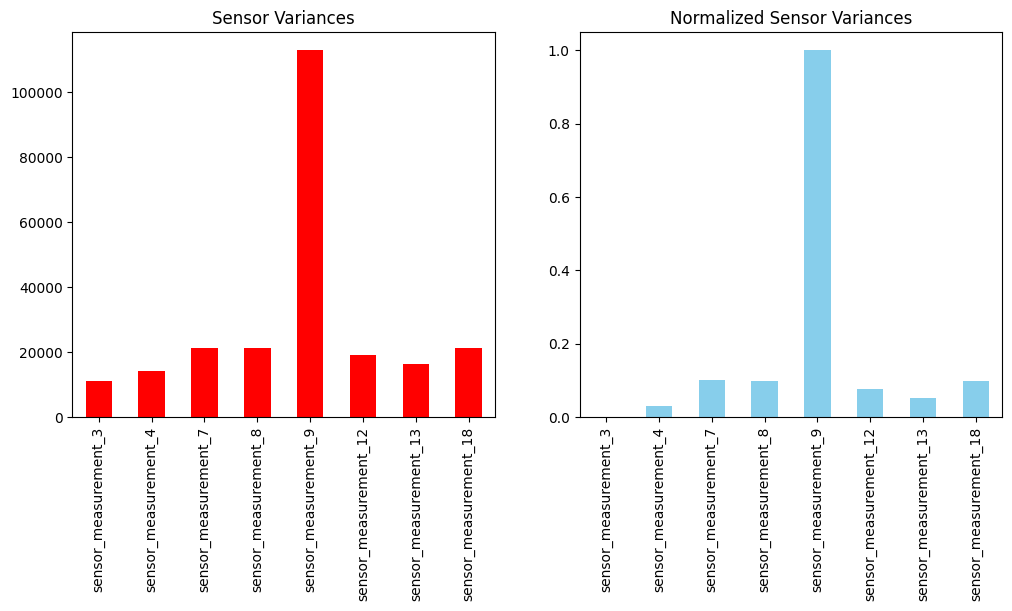

In [ ]:
sensor_cols = [column for column in data.columns if "sensor" in column]
sensor_variances = data[sensor_cols].var()
print(sensor_variances)
normalization = (sensor_variances - sensor_variances.min())/(sensor_variances.max() - sensor_variances.min()) # Using Min-Max method
print(normalization)

fig,ax=plt.subplots(1,2, figsize=(12,5))
sensor_variances.plot(fig=(12,5),ax=ax[0],kind="bar", color="red")
normalization.plot(fig=(12,5),kind="bar", color="skyblue")
ax[0].set_title("Sensor Variances")
ax[1].set_title("Normalized Sensor Variances")
plt.show()


In [ ]:
dropped_sensors = []
for sensor,variance in sensor_variances.items():
  if variance <10000:
    dropped_sensors.append(sensor)

print("Dropped sensors (When variance < 10000):")
print(dropped_sensors)

data = data.drop(columns=dropped_sensors)
data = data.drop(columns=["dataset_type"])
data

Dropped sensors (When variance < 10000):
[]


,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_12,sensor_measurement_13,sensor_measurement_18,RUL
0,1,1,34.9983,0.8400,100.0,1358.61,1137.23,194.64,2222.65,8341.91,183.06,2387.72,2223,NaN
1,1,2,41.9982,0.8408,100.0,1353.22,1125.78,138.51,2211.57,8303.96,130.42,2387.66,2212,NaN
2,1,3,24.9988,0.6218,60.0,1256.76,1047.45,175.71,1915.11,8001.42,164.22,2028.03,1915,NaN
3,1,4,42.0077,0.8416,100.0,1354.03,1126.38,138.46,2211.58,8303.96,130.72,2387.61,2212,NaN
4,1,5,25.0005,0.6203,60.0,1257.71,1047.93,175.05,1915.10,7993.23,164.31,2028.00,1915,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87745,259,119,35.0015,0.8403,100.0,1366.01,1129.47,194.87,2223.24,8367.35,183.05,2388.39,2223,51.0
87746,259,120,42.0066,0.8405,100.0,1351.13,1123.86,138.34,2212.19,8339.94,130.74,2388.31,2212,51.0
87747,259,121,42.0061,0.8400,100.0,1349.14,1118.91,138.27,2212.29,8341.70,130.96,2388.34,2212,51.0
87748,259,122,0.0024,0.0003,100.0,1589.61,1408.16,553.13,2388.05,9077.35,522.25,2388.00,2388,51.0


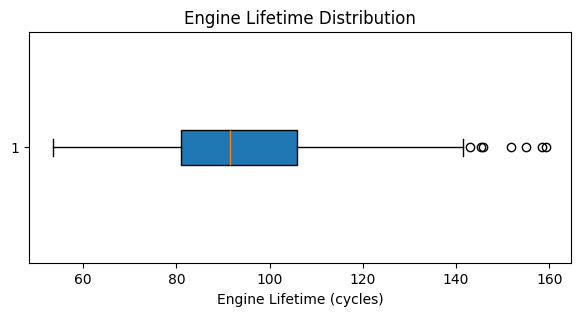

In [ ]:
lifetimes = data.groupby("unit_number")["time_in_cycles"].mean()
plt.figure(figsize=(7,3))
plt.boxplot(lifetimes, vert=False, patch_artist=True)
plt.xlabel("Engine Lifetime (cycles)")
plt.title("Engine Lifetime Distribution")
plt.show()


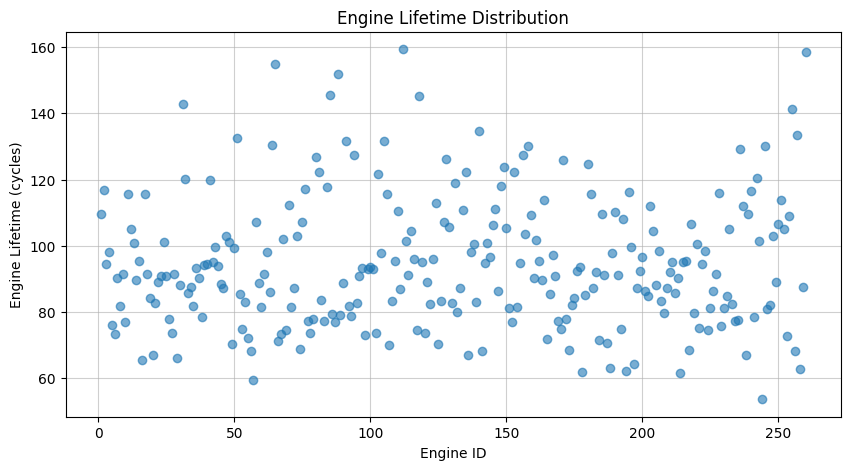

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(lifetimes.index, lifetimes.values, "o", alpha=0.6)
plt.xlabel("Engine ID")
plt.ylabel("Engine Lifetime (cycles)")
plt.title("Engine Lifetime Distribution")
plt.grid(True, alpha=0.6)

In [ ]:
op_columns = [column for column in data.columns if "operational" in column]
# Using a randomizer, we will pick 10 engines and find the basic stat information about the operational settings for them, allowing us to see what they mean.
randengines = np.random.choice(data["unit_number"].unique(), size=10)

random_engines_data = data[data["unit_number"].isin(randengines)]
operational_stats = random_engines_data.groupby("unit_number")[op_columns].describe()
print(operational_stats)




            operational_setting_1                                           \
                            count       mean        std     min        25%   
unit_number                                                                  
52                          339.0  24.424588  14.953470  0.0000  10.004200   
79                          294.0  22.829547  14.648621  0.0000  10.004475   
102                         286.0  23.551605  15.432525  0.0001  10.002200   
127                         382.0  23.864077  15.088122  0.0000  10.003775   
141                         232.0  21.558612  15.253631  0.0001   9.999925   
158                         479.0  24.029776  14.596457  0.0000  10.004750   
193                         417.0  23.453634  14.711233  0.0000  10.004800   
216                         329.0  24.218454  15.044226  0.0000  10.005000   
229                         285.0  23.223777  15.306770  0.0000  10.003900   
230                         311.0  25.057235  14.627535  0.0000 

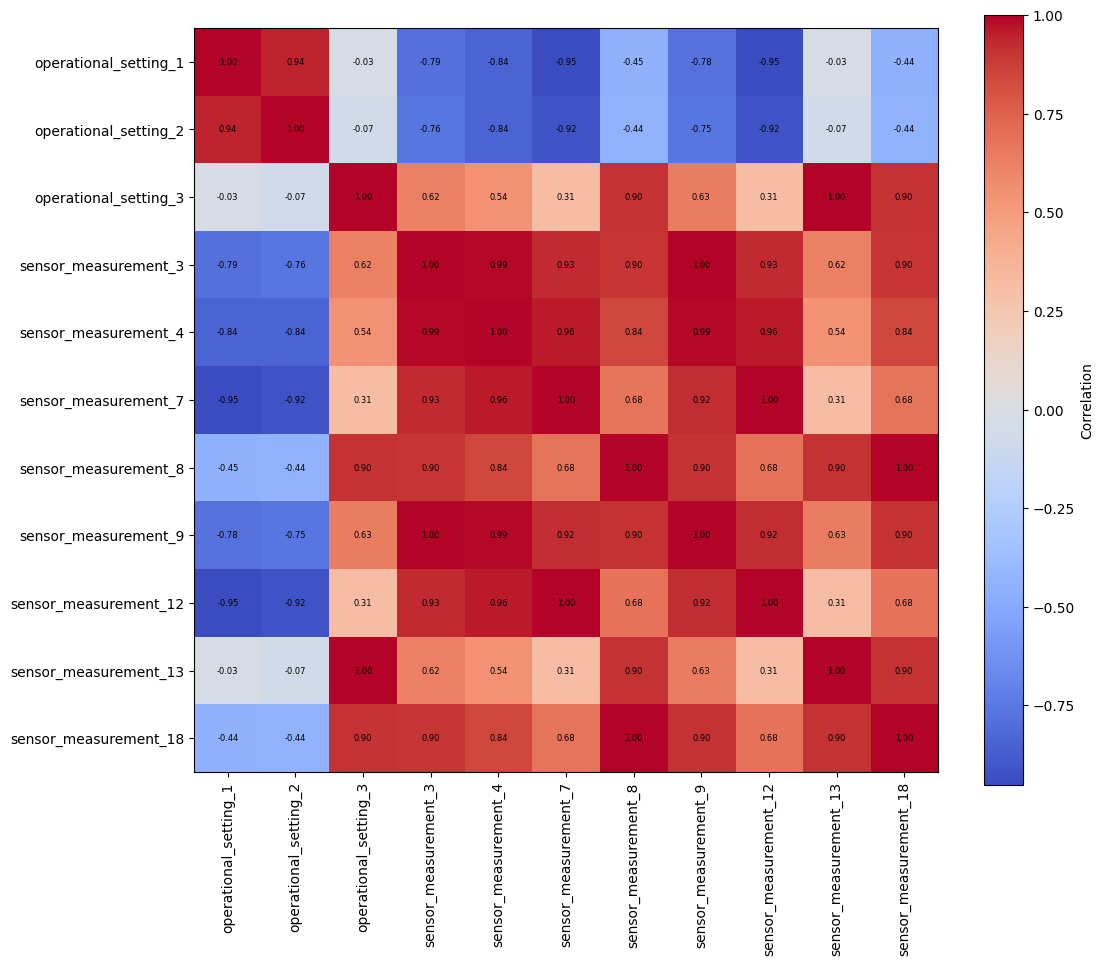

In [ ]:
op_cols = [column for column in data.columns if "operational" in column]
sensor_cols = [column for column in data.columns if "sensor" in column]

corr_features = data[op_cols+sensor_cols]

corr_matrix = corr_features.corr()

plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Correlation")

# Setting ticks
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        text = f"{corr_matrix.iloc[i,j]:.2f}"
        plt.text(j, i, text, ha="center", va="center", color="black",fontsize=6)

In [ ]:
# RUL

max_cycles = data.groupby("unit_number")["time_in_cycles"].max().reset_index()
max_cycles.columns = ["unit_number", "max_cycles"]

data = data.merge(max_cycles, on="unit_number", how="left")
data["RUL"] = data["max_cycles"] - data["time_in_cycles"]
data = data.drop(columns=["max_cycles"])
data

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_12,sensor_measurement_13,sensor_measurement_18,RUL
0,1,1,34.9983,0.8400,100.0,1358.61,1137.23,194.64,2222.65,8341.91,183.06,2387.72,2223,257
1,1,2,41.9982,0.8408,100.0,1353.22,1125.78,138.51,2211.57,8303.96,130.42,2387.66,2212,256
2,1,3,24.9988,0.6218,60.0,1256.76,1047.45,175.71,1915.11,8001.42,164.22,2028.03,1915,255
3,1,4,42.0077,0.8416,100.0,1354.03,1126.38,138.46,2211.58,8303.96,130.72,2387.61,2212,254
4,1,5,25.0005,0.6203,60.0,1257.71,1047.93,175.05,1915.10,7993.23,164.31,2028.00,1915,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87745,259,119,35.0015,0.8403,100.0,1366.01,1129.47,194.87,2223.24,8367.35,183.05,2388.39,2223,86
87746,259,120,42.0066,0.8405,100.0,1351.13,1123.86,138.34,2212.19,8339.94,130.74,2388.31,2212,85
87747,259,121,42.0061,0.8400,100.0,1349.14,1118.91,138.27,2212.29,8341.70,130.96,2388.34,2212,84
87748,259,122,0.0024,0.0003,100.0,1589.61,1408.16,553.13,2388.05,9077.35,522.25,2388.00,2388,83


In [ ]:
rolling_data = data.copy()

# Calculate rolling means and standard deviations for sensor and operational settings over a window of 5 cycles
rolling_data[op_cols + sensor_cols] = rolling_data.groupby("unit_number")[op_cols + sensor_cols].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)


rolling_data

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_12,sensor_measurement_13,sensor_measurement_18,RUL
0,1,1,34.998300,0.840000,100.000000,1358.610000,1137.230000,194.640,2222.650000,8341.910000,183.060000,2387.720000,2223.000000,257
1,1,2,38.498250,0.840400,100.000000,1355.915000,1131.505000,166.575,2217.110000,8322.935000,156.740000,2387.690000,2217.500000,256
2,1,3,33.998433,0.767533,86.666667,1322.863333,1103.486667,169.620,2116.443333,8215.763333,159.233333,2267.803333,2116.666667,255
3,1,4,36.000750,0.786050,90.000000,1330.655000,1109.210000,161.830,2140.227500,8237.812500,152.105000,2297.755000,2140.500000,254
4,1,5,33.800700,0.752900,84.000000,1316.066000,1096.954000,164.474,2095.202000,8188.896000,154.546000,2243.804000,2095.400000,253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87745,259,119,23.002820,0.600160,92.000000,1409.744000,1191.976000,290.832,2214.800000,8512.176000,273.562000,2316.278000,2214.600000,86
87746,259,120,26.403640,0.644260,100.000000,1428.016000,1206.370000,283.438,2274.124000,8576.296000,266.694000,2388.246000,2274.000000,85
87747,259,121,27.804420,0.644160,100.000000,1425.712000,1204.302000,272.082,2271.948000,8570.656000,256.314000,2388.254000,2271.800000,84
87748,259,122,23.803420,0.504220,100.000000,1446.726000,1236.312000,315.660,2284.756000,8638.854000,297.766000,2388.220000,2284.600000,83


In [ ]:
# I analyzed correlations between operational settings and sensor measurements to understand
# redundancy, environmental influences, and which sensors provide unique health information.

'''
Correlation analysis showed that many sensors are highly correlated, particularly those measuring temperature and pressure across different stages of the engine. This reflects the thermodynamic coupling of subsystems — when one part heats or pressurizes, others follow. To avoid redundancy, we handle these features with PCA.

A subset of sensors, such as Sensor 7 and Sensor 13, showed low correlation with others, suggesting they capture unique health indicators like shaft vibration or localized anomalies. These are retained in the model as they may signal independent failure modes.

The operational settings (1–3) correlate strongly with multiple sensors. These do not indicate degradation but instead capture the operating context, such as altitude, throttle setting, and environmental temperature offset. Including them ensures that the model distinguishes between environmental effects and true engine wear.
'''

# PCA

standardized_data = StandardScaler().fit_transform(rolling_data[op_cols+sensor_cols])
print(pd.DataFrame(standardized_data, columns=op_cols + sensor_cols).head(20))

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(standardized_data)
print(f"Number of components selected: {pca.n_components_}")
print(pca.explained_variance_ratio_)

X_pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
print(X_pca_df.head(20))

    operational_setting_1  operational_setting_2  operational_setting_3  \
0                1.664111               1.924093               0.917867   
1                2.192979               1.926961               0.917867   
2                1.513023               1.404547              -1.139369   
3                1.815588               1.537301              -0.625060   
4                1.483144               1.299634              -1.550816   
5                1.181117               0.984895              -2.785158   
6                1.181301               0.985038              -2.785158   
7                1.030290               1.097455              -1.550816   
8                1.030042               1.096165              -1.550816   
9                1.543826               1.411191              -0.316474   
10               2.057543               1.725930               0.917867   
11               0.788156               0.521605               0.917867   
12               0.788104

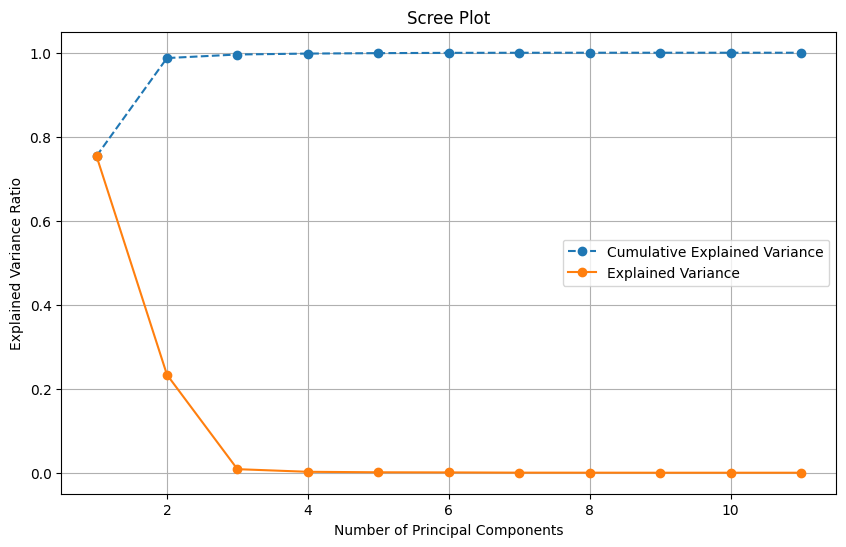

In [ ]:
# Performing PCA with all components and features
pca_full = PCA()
pca_full.fit(standardized_data)

# Calculate explained variance ratio
explained_variance_ratio = pca_full.explained_variance_ratio_

# Use the data to generate a scree plot, which allows us to see the optimal number of principal components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker="o", linestyle="--", label="Cumulative Explained Variance")
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker="o", linestyle="-", label="Explained Variance")
plt.title("Scree Plot")
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Final Dataset
final_data = rolling_data.reset_index(drop=True).join(X_pca_df)

display(final_data.head(30))

,unit_number,time_in_cycles,operational_setting_1,operational_setting_2,operational_setting_3,sensor_measurement_3,sensor_measurement_4,sensor_measurement_7,sensor_measurement_8,sensor_measurement_9,sensor_measurement_12,sensor_measurement_13,sensor_measurement_18,RUL,PC1,PC2
0,1,1,34.998300,0.840000,100.000000,1358.610000,1137.230000,194.640,2222.650000,8341.910000,183.060000,2387.720000,2223.000000,257,-2.755858,2.909024
1,1,2,38.498250,0.840400,100.000000,1355.915000,1131.505000,166.575,2217.110000,8322.935000,156.740000,2387.690000,2217.500000,256,-3.324595,3.278090
2,1,3,33.998433,0.767533,86.666667,1322.863333,1103.486667,169.620,2116.443333,8215.763333,159.233333,2267.803333,2116.666667,255,-5.512616,0.061725
3,1,4,36.000750,0.786050,90.000000,1330.655000,1109.210000,161.830,2140.227500,8237.812500,152.105000,2297.755000,2140.500000,254,-5.105558,0.958176
4,1,5,33.800700,0.752900,84.000000,1316.066000,1096.954000,164.474,2095.202000,8188.896000,154.546000,2243.804000,2095.400000,253,-6.063948,-0.508270
5,1,6,31.801940,0.709000,76.000000,1297.620000,1079.252000,160.580,2033.702000,8119.734000,150.788000,2171.862000,2033.800000,252,-7.477385,-2.365276
6,1,7,31.803160,0.709020,76.000000,1296.466000,1079.534000,160.620,2033.712000,8120.492000,150.802000,2171.868000,2033.800000,251,-7.481964,-2.365413
7,1,8,30.803800,0.724700,84.000000,1341.452000,1120.516000,192.360,2115.464000,8262.032000,180.980000,2243.860000,2115.600000,250,-4.921305,-0.828949
8,1,9,30.802160,0.724520,84.000000,1340.292000,1120.730000,192.280,2115.470000,8263.706000,181.030000,2243.862000,2115.600000,249,-4.924212,-0.829435
9,1,10,34.202280,0.768460,92.000000,1360.030000,1136.566000,185.010,2174.762000,8325.522000,174.268000,2315.786000,2175.000000,248,-3.717317,1.173660


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features(X) and target(y)
X = final_data.drop(columns=["RUL", "dataset_type"])
y = final_data["RUL"]
unit_numbers = final_data["unit_number"].unique()

# Split unit numbers into train, cross validation, and test sets in a 60/20/20 split
train_units, test_units = train_test_split(unit_numbers, test_size=0.2, random_state=42)
train_units, cv_units = train_test_split(train_units, test_size=0.25, random_state=42)

# Split the data based on unit numbers
X_train = X[X["unit_number"].isin(train_units)].copy()
y_train = y[X["unit_number"].isin(train_units)].copy()

X_cv = X[X["unit_number"].isin(cv_units)].copy()
y_cv = y[X["unit_number"].isin(cv_units)].copy()

X_test = X[X["unit_number"].isin(test_units)].copy()
y_test = y[X["unit_number"].isin(test_units)].copy()

# 'unit_number' and 'time_in_cycles' columns are not needed for training
X_train = X_train.drop(columns=["unit_number", "time_in_cycles"])
X_cv = X_cv.drop(columns=["unit_number", "time_in_cycles"])
X_test = X_test.drop(columns=["unit_number", "time_in_cycles"])

print("Training set shapes:", X_train.shape, y_train.shape)
print("Cross-validation set shapes:", X_cv.shape, y_cv.shape)
print("Testing set shapes:", X_test.shape, y_test.shape)

Training set shapes: (53070, 13) (53070,)
Cross-validation set shapes: (17617, 13) (17617,)
Testing set shapes: (17063, 13) (17063,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions on the cross-validation set
y_cv_pred = rf_model.predict(X_cv)

# Evaluate the model on the cross-validation set
mse_cv = mean_squared_error(y_cv, y_cv_pred)
rmse_cv = np.sqrt(mse_cv)

print(f"Cross-validation Mean Squared Error (MSE): {mse_cv}")
print(f"Cross-validation Root Mean Squared Error (RMSE): {rmse_cv}")

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f"Test Mean Squared Error (MSE): {mse_test}")
print(f"Test Root Mean Squared Error (RMSE): {rmse_test}")

Cross-validation Mean Squared Error (MSE): 2671.5953869728105
Cross-validation Root Mean Squared Error (RMSE): 51.68747804809991
Test Mean Squared Error (MSE): 2805.9892348180274
Test Root Mean Squared Error (RMSE): 52.97158893990275


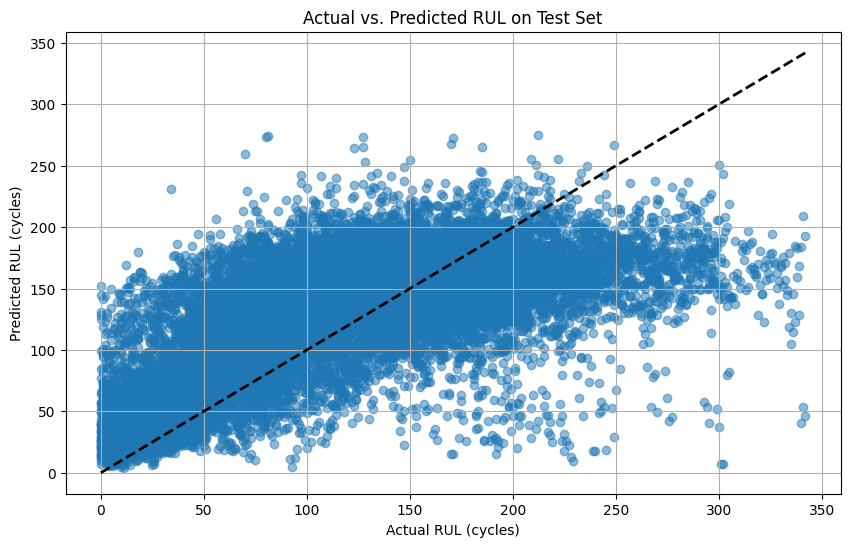

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("Actual RUL (cycles)")
plt.ylabel("Predicted RUL (cycles)")
plt.title("Actual vs. Predicted RUL on Test Set")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Diagonal line
plt.grid(True)
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Initialize and train the XGBoost Regressor model
xgbr_model = xgb.XGBRegressor(objective="reg:squarederror", # Regression with squared error
                              n_estimators=100,          # Number of boosting rounds
                              learning_rate=0.1,         # Step size shrinkage
                              max_depth=6,               # Maximum depth of a tree
                              random_state=42,           # for reproducibility
                              n_jobs=-1)                 # Use all available cores

xgbr_model.fit(X_train, y_train)

# Make predictions on the cross-validation set
y_cv_pred_xgb = xgbr_model.predict(X_cv)

# Evaluate the model on the cross-validation set
mse_cv_xgb = mean_squared_error(y_cv, y_cv_pred_xgb)
rmse_cv_xgb = np.sqrt(mse_cv_xgb)

print(f"XGBoost Cross-validation Mean Squared Error (MSE): {mse_cv_xgb}")
print(f"XGBoost Cross-validation Root Mean Squared Error (RMSE): {rmse_cv_xgb}")

# Make predictions on the test set
y_test_pred_xgb = xgbr_model.predict(X_test)

# Evaluate the model on the test set
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
rmse_test_xgb = np.sqrt(mse_test_xgb)

print(f"XGBoost Test Mean Squared Error (MSE): {mse_test_xgb}")
print(f"XGBoost Test Root Mean Squared Error (RMSE): {rmse_test_xgb}")

XGBoost Cross-validation Mean Squared Error (MSE): 2585.014404296875
XGBoost Cross-validation Root Mean Squared Error (RMSE): 50.843036930310085
XGBoost Test Mean Squared Error (MSE): 2724.628173828125
XGBoost Test Root Mean Squared Error (RMSE): 52.19797097424502


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import randint

# Define the parameter distributions to sample from
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, scoring='neg_mean_squared_error',
                                   random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best model and its parameters
best_rf_model = random_search.best_estimator_
best_params = random_search.best_params_

print("Best hyperparameters found:", best_params)

# Make predictions on the cross-validation set with the best model
y_cv_pred_tuned = best_rf_model.predict(X_cv)

# Evaluate the best model on the cross-validation set
mse_cv_tuned = mean_squared_error(y_cv, y_cv_pred_tuned)
rmse_cv_tuned = np.sqrt(mse_cv_tuned)

print(f"Tuned Random Forest Cross-validation Mean Squared Error (MSE): {mse_cv_tuned}")
print(f"Tuned Random Forest Cross-validation Root Mean Squared Error (RMSE): {rmse_cv_tuned}")

# Make predictions on the test set with the best model
y_test_pred_tuned = best_rf_model.predict(X_test)

# Evaluate the best model on the test set
mse_test_tuned = mean_squared_error(y_test, y_test_pred_tuned)
rmse_test_tuned = np.sqrt(mse_test_tuned)

print(f"Tuned Random Forest Test Mean Squared Error (MSE): {mse_test_tuned}")
print(f"Tuned Random Forest Test Root Mean Squared Error (RMSE): {rmse_test_tuned}")

Best hyperparameters found: {'max_depth': None, 'min_samples_leaf': 7, 'min_samples_split': 12, 'n_estimators': 137}
Tuned Random Forest Cross-validation Mean Squared Error (MSE): 2570.5619337948206
Tuned Random Forest Cross-validation Root Mean Squared Error (RMSE): 50.70070940129754
Tuned Random Forest Test Mean Squared Error (MSE): 2700.9204404115453
Tuned Random Forest Test Root Mean Squared Error (RMSE): 51.97038041434318
